<h3 align="right">Felix Filipi</h3>
<h3 align="right">2301877590</h3>

<h1 align="center">Ujian Tengah Semester</h1>
<h1 align="center">Deep Learning</h1>

<hr>

<h1> 3 </h1>

[LO 1, LO 2, LO 3 & LO 4, 30 points] Using Tensorflow and Keras library and python notebook, you
are supposed to classify scenes into one out of four (4) categories (automobile, cat, dog, and
truck) by training and testing on CIFAR-10 image datasets that can be downloaded from
(https://www.cs.toronto.edu/~kriz/cifar.html ). Your detailed tasks will be as follows:

a. [10 points] Build a CNN model to extract features and train a classifier on extracted
features. The size of the input is (32x32x3) and the suggested architecture of your CNN is
as follows: Conv(16,3x3), Relu, Conv(32,3x3), Relu, Conv(64,3x3), 2FC, and Softmax(4).

b. [10 points] Test your trained model to perform 4-class classification problems
(automobile, cat, dog, and truck).

c. [10 points] Illustrate your classification results using a confusion matrix and report
classification accuracy of your classifier.
Again, please do not forget to put your analysis, comments, and/or info needed in order to make
your work more understandable
<hr>

We are asked to create a custom multiclass classification of automobile, cat and dog and truck using Convolutional Neural Network (CNN) architecture. The architecture has been defined by case with Conv(16,3x3), Relu, Conv(32,3x3), Relu, Conv(64,3x3), 2FC, and Softmax(4). Here I will use keras framework from tensorflow to make programming easier.

<b>First, we have to import some libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import (
    Dense,
    Conv2D,
    Flatten,
)

<b>Now, we need to get our dataset, there are three ways to get the data:

1. Using wget commands.
2. Download the dataset manual to the site.
3. The simplest one, call it from keras datasets

Here, we just need to call it from keras datasets, due to its simplicity

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

### After getting the dataset, we need to define only the required set which instructed to us. The required set is automobile (label = 1), cat (label = 3), dog (label = 5), truck (label = 9).

In [3]:
X_train = X_train[np.isin(y_train, [1,3,5,9]).flatten()]
X_test = X_test[np.isin(y_test, [1,3,5,9]).flatten()]
y_train = y_train[np.isin(y_train, [1,3,5,9]).flatten()].flatten()
y_test = y_test[np.isin(y_test, [1,3,5,9]).flatten()].flatten()

Just to give information, we can print the set count, shape, and example of the set.

In [4]:
print(np.unique(y_train, return_counts = True))
print(y_train.shape)
print(y_train)

(array([1, 3, 5, 9], dtype=uint8), array([5000, 5000, 5000, 5000]))
(20000,)
[9 9 1 ... 9 1 1]


<b> Now we've already get the dataset, but we need to transform the set to the new label which is [0,1,2,3] because we will encode the label using to_categorical function.

In [5]:
def transform(x):
    for i in range(len(x)):
        if(x[i] == 1):
            x[i] = 0
        elif(x[i] == 3):
            x[i] = 1
        elif(x[i] == 5):
            x[i] = 2
        else:
            x[i] = 3
    return x

Call the function above

In [6]:
y_train = transform(y_train)
y_test = transform(y_test)

Print several important information about the set

In [7]:
print(np.unique(y_train, return_counts = True))
print(y_train.shape)
print(y_train)

(array([0, 1, 2, 3], dtype=uint8), array([5000, 5000, 5000, 5000]))
(20000,)
[3 3 0 ... 3 0 0]


<b>As we can see here, the label has been transformed to (0,1,2,3). Now this label ready to be encoded using to_categorical function from keras.

In [8]:
y_train = to_categorical(y_train, dtype ="uint8")
y_test_categorical = to_categorical(y_test, dtype ="uint8")
y_train.shape

(20000, 4)

## Now, we can normalize the dataset by dividing it with 255

In [9]:
X_train = X_train / 255.0
X_test = X_test / 255.0

### Now we need to go to the first instruction. Build a CNN model to extract features and train a classifier on extracted features. The size of the input is (32x32x3) and the suggested architecture of your CNN is as follows:</b>

1. Conv(16,3x3), Relu
2. Conv(32,3x3), Relu
3. Conv(64,3x3), Relu
4. 2FC
5. Softmax(4).

In [10]:
model = Sequential()

#Conv(16,(3x3))
model.add(Conv2D(16, (3, 3), activation="relu", padding="same",
                 input_shape=(32, 32, 3))) 

#Conv(32,3x3)
model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))

#Conv(64,3x3)
model.add(Conv2D(64, (3, 3), activation="relu", padding="same"))

model.add(Flatten())

# 2FC (Fully Connected)
model.add(Dense(units=128, activation="relu"))
model.add(Dense(units=128, activation="relu"))

# Softmax(4)
model.add(Dense(units=4, activation="softmax"))

2021-11-25 01:05:21.846981: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-25 01:05:22.126893: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory
2021-11-25 01:05:22.126930: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2021-11-25 01:05:22.127331: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN

<b>Now we will use categorical_crossentropy as a loss function because our output is a multi class classification. And use gradient descent optimizer as backpropagation algorithm.

In [11]:
model.compile(loss='categorical_crossentropy', optimizer = 'sgd', metrics=['accuracy'])

<h2> Training Process</h2>

In [12]:
history = model.fit(X_train,y_train,epochs = 20, validation_split=0.2)

2021-11-25 01:05:22.535719: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 196608000 exceeds 10% of free system memory.


Epoch 1/20
500/500 [==============================] - 66s 132ms/step - loss: 1.1346 - accuracy: 0.4691 - val_loss: 1.0126 - val_accuracy: 0.5362
Epoch 2/20
500/500 [==============================] - 64s 128ms/step - loss: 0.9501 - accuracy: 0.5634 - val_loss: 0.9225 - val_accuracy: 0.5805
Epoch 3/20
500/500 [==============================] - 64s 128ms/step - loss: 0.8373 - accuracy: 0.6135 - val_loss: 0.8321 - val_accuracy: 0.6217
Epoch 4/20
500/500 [==============================] - 64s 128ms/step - loss: 0.7711 - accuracy: 0.6461 - val_loss: 0.8200 - val_accuracy: 0.6170
Epoch 5/20
500/500 [==============================] - 64s 128ms/step - loss: 0.7155 - accuracy: 0.6761 - val_loss: 0.7777 - val_accuracy: 0.6513
Epoch 6/20
500/500 [==============================] - 64s 128ms/step - loss: 0.6681 - accuracy: 0.7016 - val_loss: 0.6988 - val_accuracy: 0.6858
Epoch 7/20
500/500 [==============================] - 64s 128ms/step - loss: 0.6309 - accuracy: 0.7182 - val_loss: 0.7027 - val_ac

<h2>Training accuracy and validation curves as a function of number of epochs.

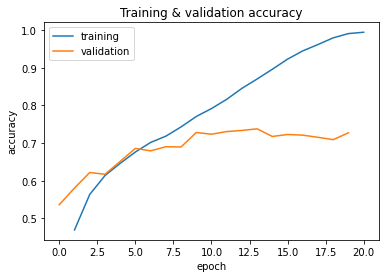

In [13]:
epochs = range(1, len(history.history['accuracy'])+1)
plt.plot(epochs,history.history['accuracy'],history.history['val_accuracy'])
plt.title('Training & validation accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['training','validation'])
plt.show()

### B. Test your trained model to perform 4-class classification problems (automobile, cat, dog, and truck).

<b>Try to predict the test set, to check the performance of the trained model to perform 4 class classification problem.

In [14]:
prediction = model.predict(X_test)
prediction = np.argmax(prediction, axis=1)
prediction

array([1, 0, 1, ..., 2, 2, 0])

Print important information, just to let the user know that the model has able to predict the set

In [15]:
np.unique(prediction, return_counts=True)

(array([0, 1, 2, 3]), array([ 925,  978, 1061, 1036]))

In [16]:
np.unique(y_test, return_counts=True)

(array([0, 1, 2, 3], dtype=uint8), array([1000, 1000, 1000, 1000]))

### To give visualization of the predicted image, we can plot the image and print the prediction as well.

automobile


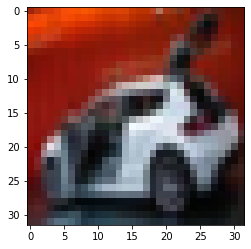

In [17]:
plt.imshow(X_test[1])

if(prediction[1] == 0):
    print('automobile')
elif(prediction[1] == 1):
    print('cat')
elif(prediction[1] == 2):
    print('dog')
else:
    print('truck')

### C. Illustrate your classification results using a confusion matrix and report classification accuracy of your classifier. Again, please do not forget to put your analysis, comments, and/or info needed in order to make your work more understandable

### Report Classification accuracy

In [18]:
loss, accuracy = model.evaluate(X_test, y_test_categorical, verbose=0)
print(f"Loss = {loss}")
print(f"Accuracy = {round(accuracy*100,2)}%")

Loss = 1.2661030292510986
Accuracy = 72.1%


<b>Analysis</b>

The model's overfitting. This can be seen according to the training accuracy vs validation accuracy. THe training set has high accuracy which is 99.45%, meanwhile the testing set return only 72.1%. This means that our model's overfitting. So, how to solve this problem? To overcome this, we should add regularization or dropout layer to generalize the model. The other things that might help is using augmentation techniques to increase the dataset. 

But, even this model's overfitting, this model's good enough and capable to classify the image for multiclass classification.

### Confusion matrix

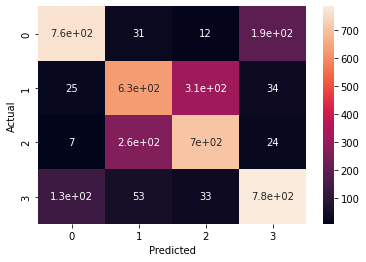

In [19]:
y_test = y_test.flatten()
confusion_matrix = pd.crosstab(y_test, prediction, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
plt.show()

# Now, let's save the model 

In [20]:
model.save("my_model")

2021-11-25 01:26:57.084123: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: my_model/assets
